In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import KMeans 

In [106]:
data=pd.read_csv("bank_marketing_part1_Data.csv")

In [107]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [108]:
data.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [110]:
data.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [111]:
data.duplicated().sum()

0

In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


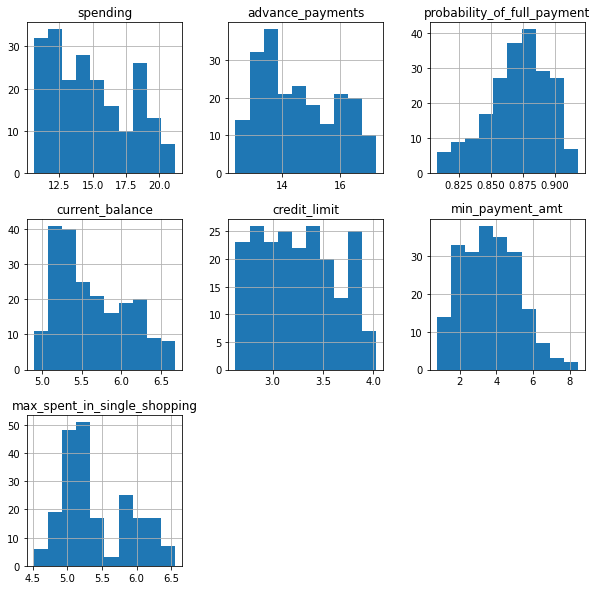

In [113]:
data.hist(figsize=(10,10));
plt.savefig("uni.jpg")

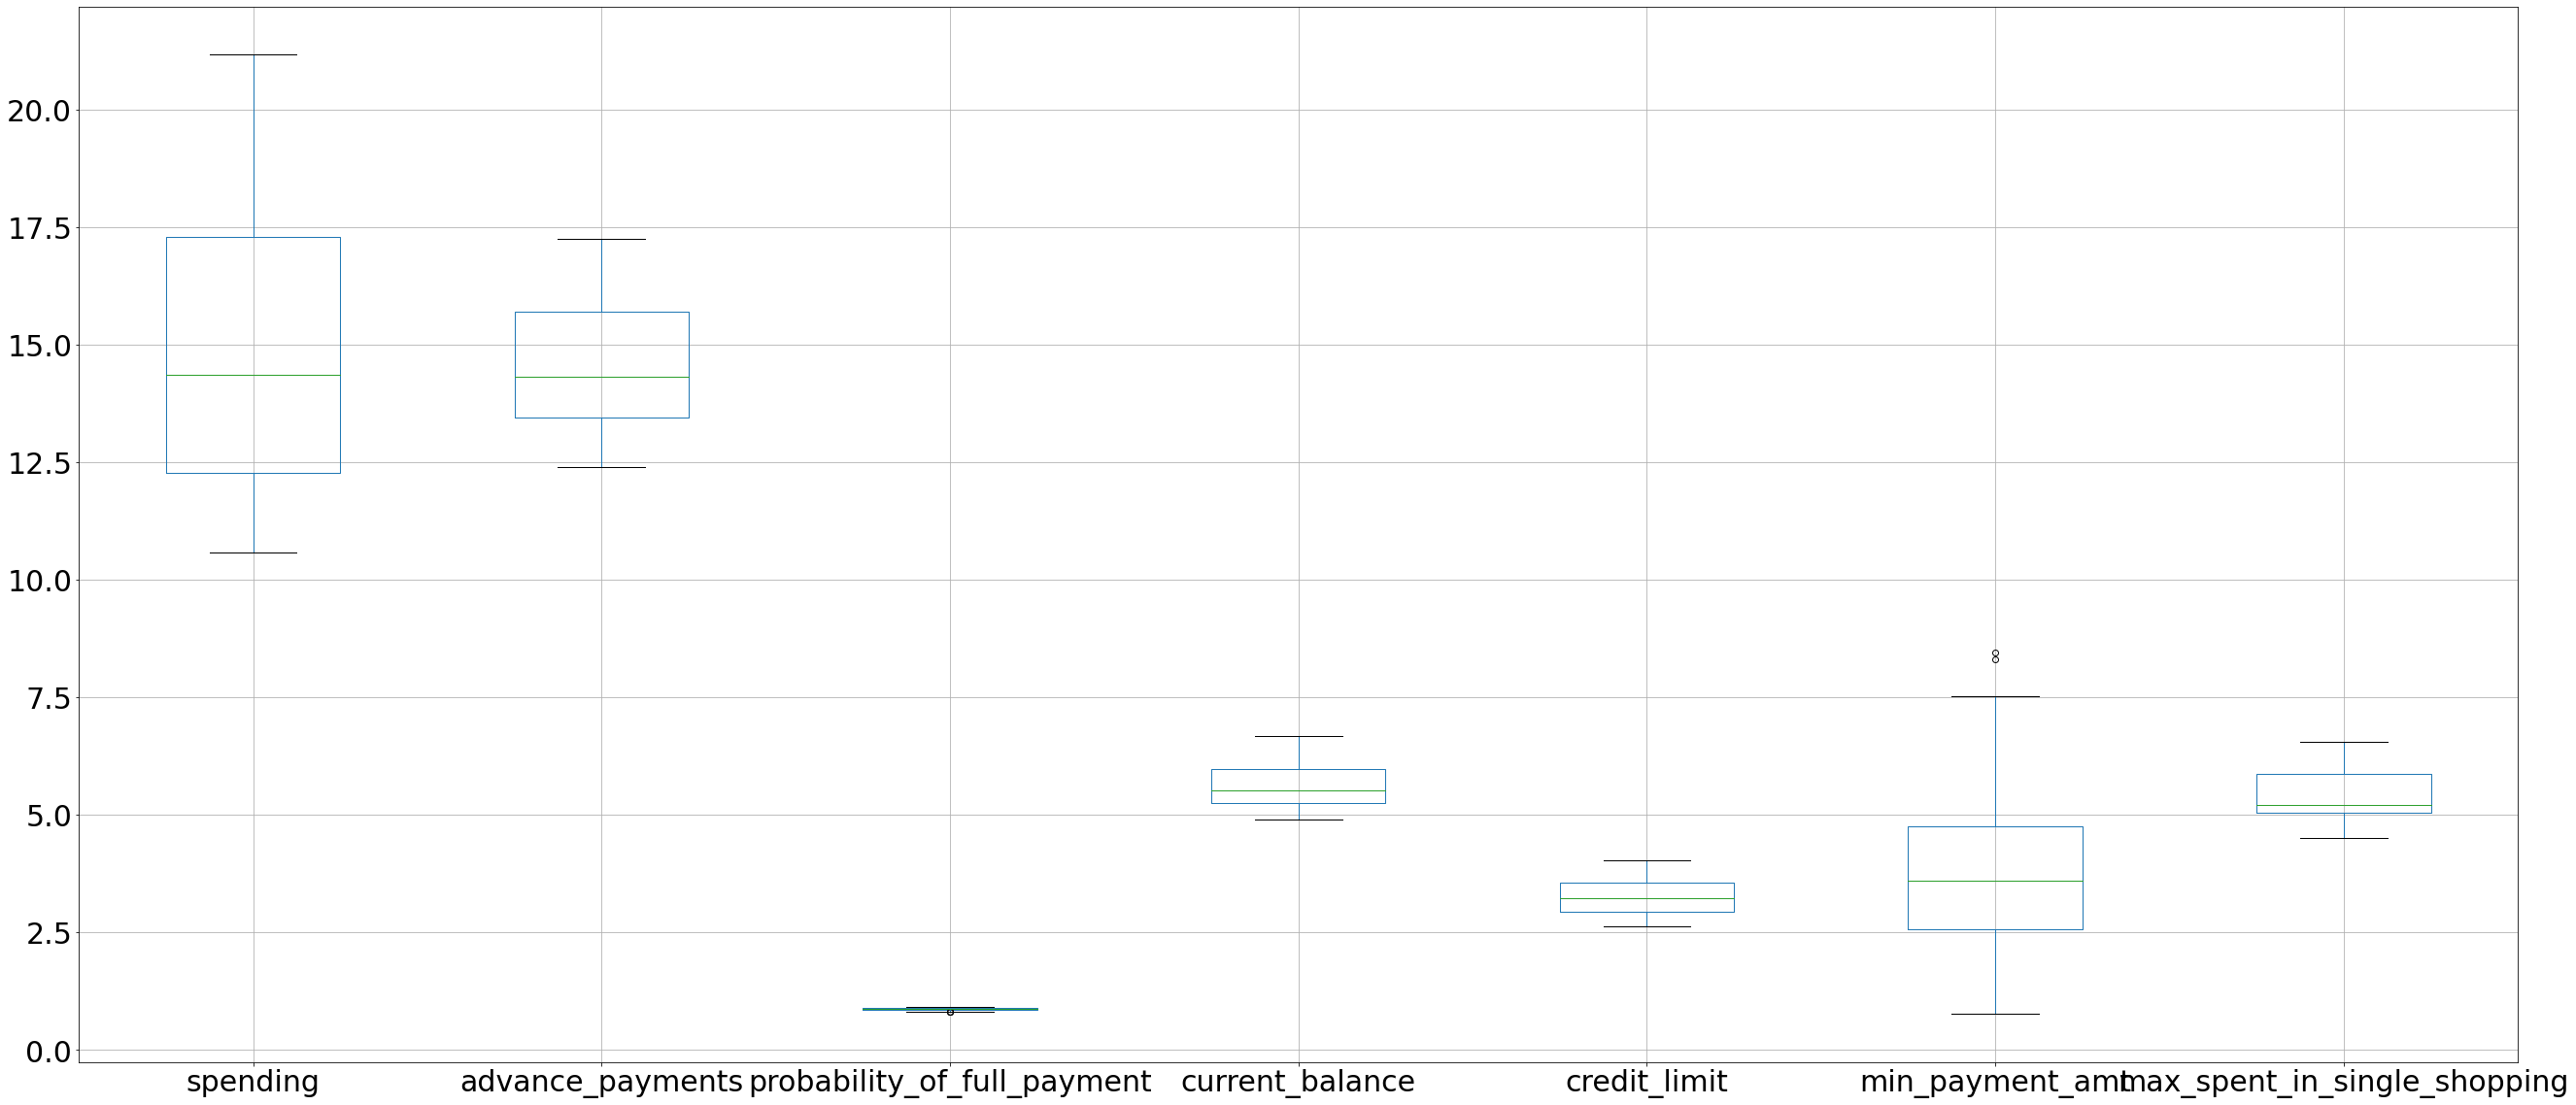

In [114]:
data.boxplot(figsize=(45,20),fontsize=30)
plt.savefig("box.jpg")

In [115]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [116]:
lr,ur=remove_outlier(data['probability_of_full_payment'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data['probability_of_full_payment']=np.where(data['probability_of_full_payment']>ur,ur,data['probability_of_full_payment'])
data['probability_of_full_payment']=np.where(data['probability_of_full_payment']<lr,lr,data['probability_of_full_payment'])

Lower Range : 0.8105875 
Upper Range : 0.9340875


In [117]:
lr,ur=remove_outlier(data['min_payment_amt'])
print('Lower Range :',lr,'\nUpper Range :',ur)
data['min_payment_amt']=np.where(data['min_payment_amt']>ur,ur,data['min_payment_amt'])
data['min_payment_amt']=np.where(data['min_payment_amt']<lr,lr,data['min_payment_amt'])

Lower Range : -0.7493750000000006 
Upper Range : 8.079625


<AxesSubplot:>

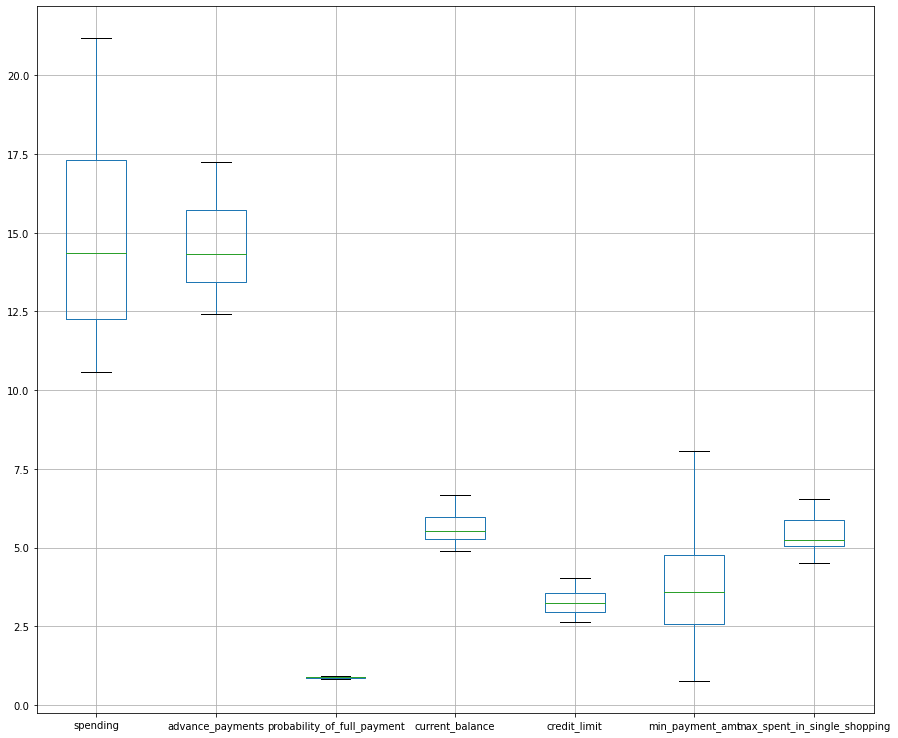

In [118]:
data.boxplot(figsize=(15,13))

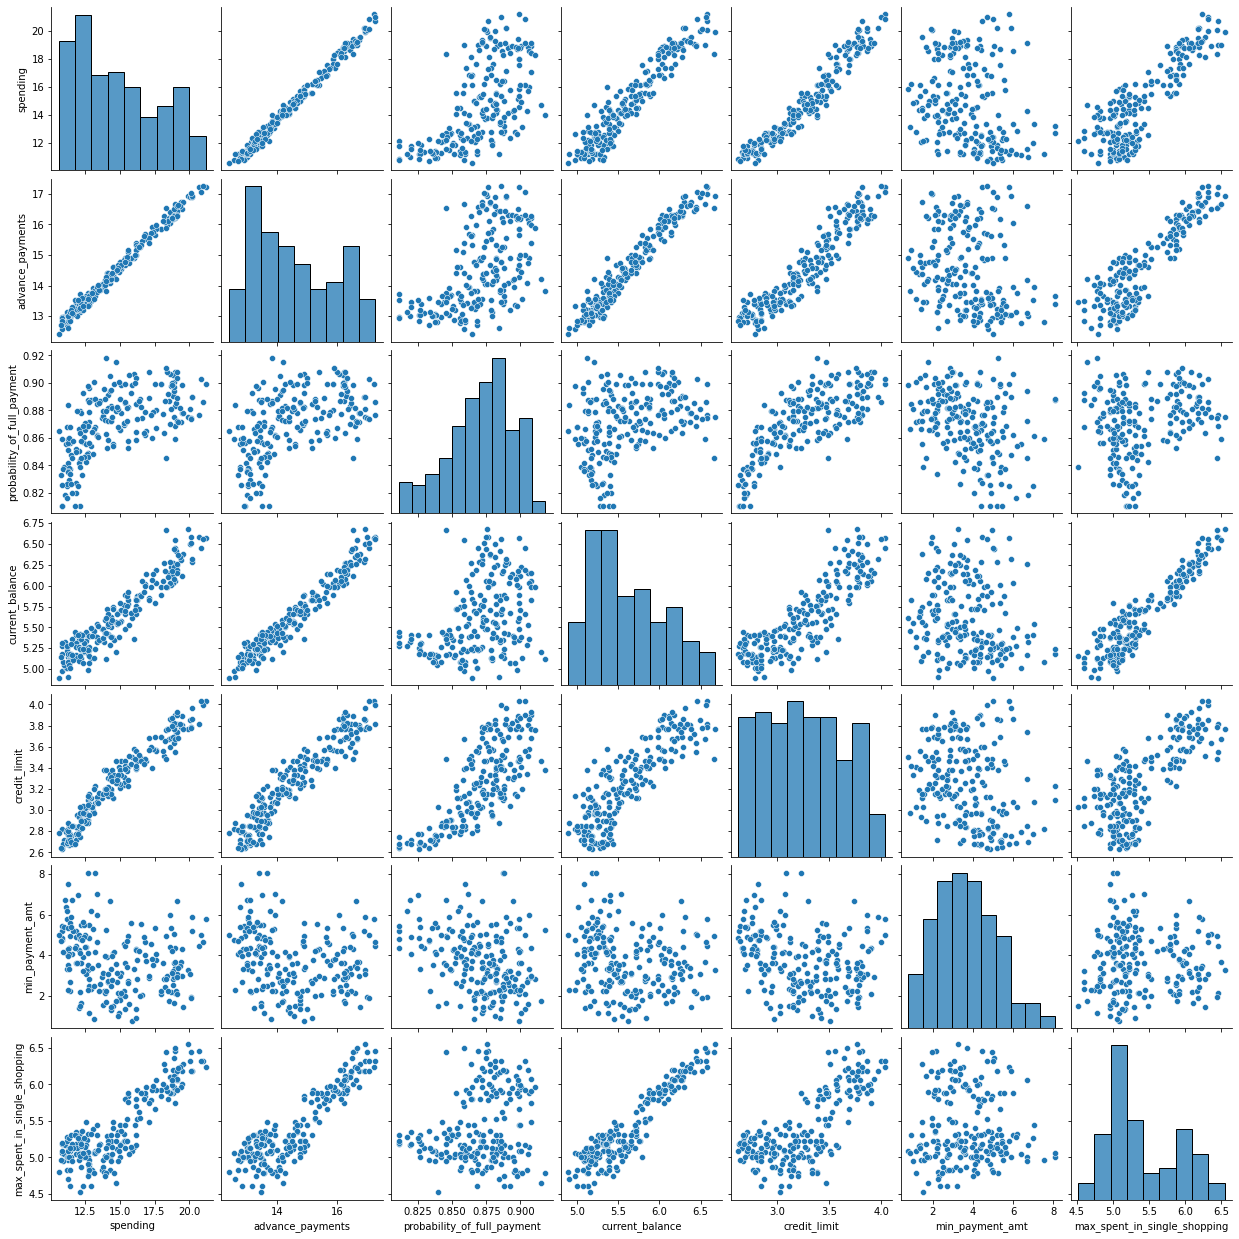

In [119]:
sns.pairplot(data)
plt.savefig("all.jpg")

In [120]:
c=data.corr()

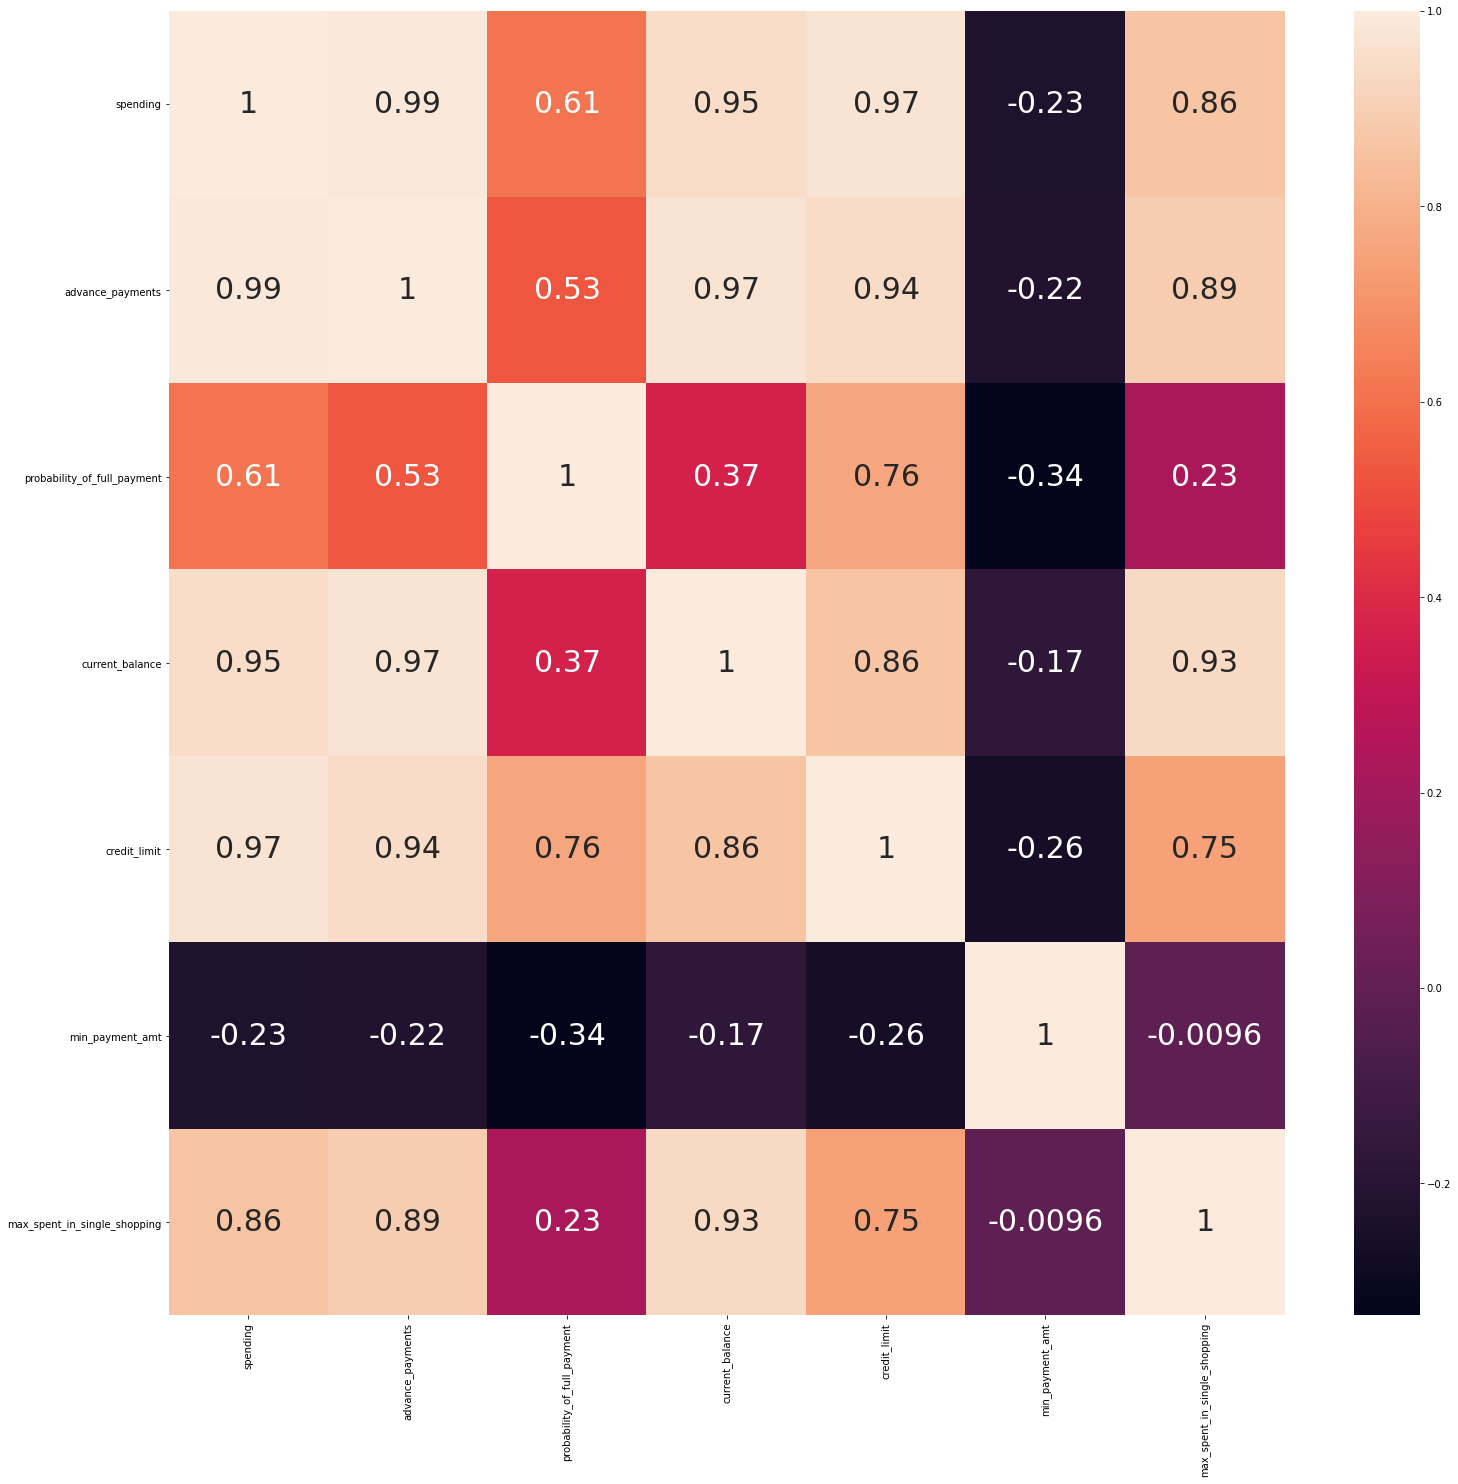

In [121]:
sns.heatmap(c,annot=True,annot_kws={'size':30})
figure=plt.gcf()
figure.set_figheight(24)
figure.set_figwidth(25)
plt.savefig("corr.jpg",dpi=300)


In [122]:
data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
mn=MinMaxScaler()

In [125]:
dm=mn.fit_transform(data)

In [126]:
dm=pd.DataFrame(dm,columns=data.columns)
dm

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.599861,1.000000,0.807555,0.339995,1.000000
1,0.509915,0.512397,0.889521,0.261261,0.678546,0.351479,0.307730
2,0.789424,0.828512,0.671347,0.759572,0.801853,0.355854,0.802068
3,0.022663,0.113636,0.000000,0.213401,0.007840,0.603853,0.327917
4,0.698772,0.712810,0.822676,0.557995,0.758375,0.178125,0.648941
...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.718696,0.304054,0.405560,0.440343,0.107829
206,0.583569,0.663223,0.494023,0.578829,0.575909,0.568034,0.628262
207,0.324835,0.361570,0.640710,0.303491,0.406985,0.130138,0.237322
208,0.522191,0.535124,0.830103,0.456081,0.609408,0.205741,0.454948


In [127]:
dm.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.402032,0.444067,0.561101,0.410773,0.448043,0.400872,0.437751
std,0.274759,0.269826,0.218730,0.249473,0.269219,0.204345,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.158640,0.214876,0.429964,0.204533,0.223806,0.245594,0.258986
50%,0.355524,0.394628,0.583614,0.351633,0.432644,0.387435,0.346627
75%,0.634089,0.682851,0.716607,0.608530,0.664113,0.547356,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


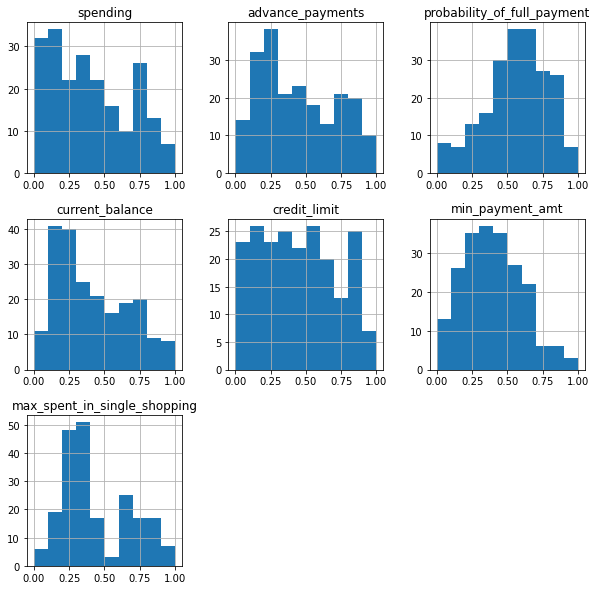

In [128]:
dm.hist(figsize=(10,10));

In [129]:
link=linkage(dm,method='ward')

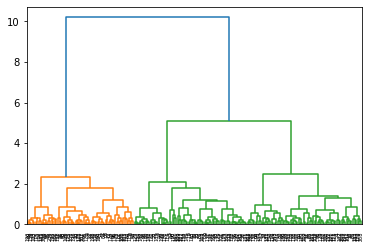

In [130]:
dend=dendrogram(link,color_threshold=8)
plt.savefig("dend4.jpg")

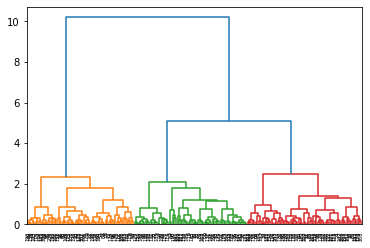

In [131]:
dend=dendrogram(link,color_threshold=4)
plt.savefig("dend.jpg")

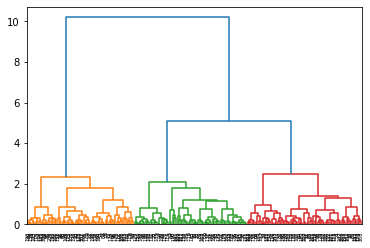

In [132]:
dend=dendrogram(link,color_threshold=3)
plt.savefig("dend2.jpg")

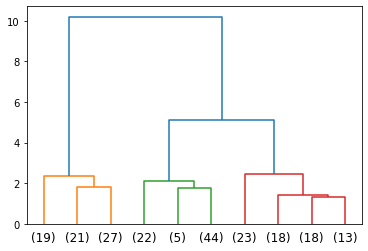

In [133]:
dendo=dendrogram(link,truncate_mode='lastp',p=10,color_threshold=3)
plt.savefig("dendo.jpg")

C:\Users\Mandira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


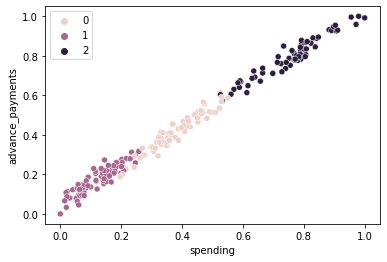

In [152]:
sns.scatterplot(dm.spending,dm.advance_payments,hue=label);
plt.savefig("advnc.jpg")


C:\Users\Mandira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


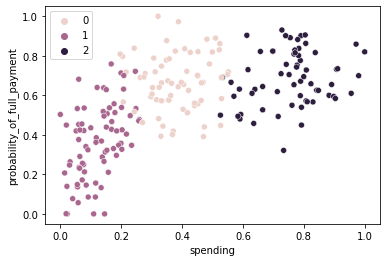

In [153]:
sns.scatterplot(dm.spending,dm.probability_of_full_payment,hue=label);
plt.savefig("advnc1.jpg")


C:\Users\Mandira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


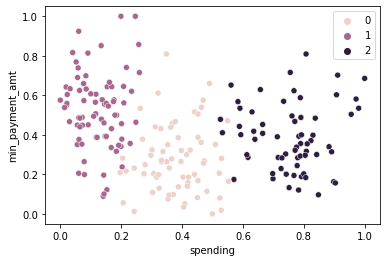

In [154]:
sns.scatterplot(dm.spending,dm.min_payment_amt,hue=label);
plt.savefig("advnc2.jpg")

In [134]:
kmean=KMeans(n_clusters=3)
kmean.fit(dm)
label=kmean.labels_
dm['label']=label
dm

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,label
0,0.882908,0.931818,0.599861,1.000000,0.807555,0.339995,1.000000,2
1,0.509915,0.512397,0.889521,0.261261,0.678546,0.351479,0.307730,0
2,0.789424,0.828512,0.671347,0.759572,0.801853,0.355854,0.802068,2
3,0.022663,0.113636,0.000000,0.213401,0.007840,0.603853,0.327917,1
4,0.698772,0.712810,0.822676,0.557995,0.758375,0.178125,0.648941,2
...,...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.718696,0.304054,0.405560,0.440343,0.107829,0
206,0.583569,0.663223,0.494023,0.578829,0.575909,0.568034,0.628262,2
207,0.324835,0.361570,0.640710,0.303491,0.406985,0.130138,0.237322,0
208,0.522191,0.535124,0.830103,0.456081,0.609408,0.205741,0.454948,0


In [135]:
wss=[]
for i in range (1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(dm)
    wss.append(kmean.inertia_)
wss

[222.99615618688216,
 73.86441050720778,
 22.770013026036565,
 20.342286620549206,
 18.122433621745508,
 16.041475796008754,
 14.519876997082017,
 13.1282266111827,
 12.312701513656892,
 11.278070600710317]

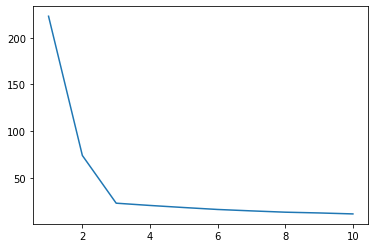

In [155]:
plt.plot(range(1,11),wss);
plt.savefig("elbow.jpg")

In [137]:
dm.describe().T


,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.561101,0.218730,0.0,0.429964,0.583614,0.716607,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.400872,0.204345,0.0,0.245594,0.387435,0.547356,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0
label,210.0,0.976190,0.797367,0.0,0.000000,1.000000,2.000000,2.0


In [138]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [140]:
silhouette_score(dm,label)

0.6829039035011866

In [158]:
sil_wid=silhouette_samples(dm,label)


In [159]:
data['sil_width']=sil_wid
data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0.741962
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0.652259
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0.816489
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0.656881
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0.729414
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.888000,5.439,3.199,3.986,4.738,0.633265
206,16.77,15.62,0.863800,5.927,3.438,4.920,5.795,0.629475
207,14.03,14.16,0.879600,5.438,3.201,1.717,5.001,0.701333
208,16.12,15.00,0.900000,5.709,3.485,2.270,5.443,0.680699


In [143]:
silhouette_samples(dm,label).min()

0.44243887518866265

In [144]:
d=dm

In [145]:
d.label.value_counts()

1    77
0    69
2    64
Name: label, dtype: int64

In [147]:
kmean_cluster=pd.DataFrame(round(d.groupby('label').mean(),1))
kmean_cluster.T

label,0,1,2
spending,0.4,0.1,0.8
advance_payments,0.4,0.2,0.8
probability_of_full_payment,0.7,0.4,0.7
current_balance,0.4,0.2,0.7
credit_limit,0.5,0.2,0.8
min_payment_amt,0.3,0.5,0.4
max_spent_in_single_shopping,0.3,0.3,0.8
